In [251]:
from PIL import Image, ImageEnhance
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [398]:
#define the image path
image_path = "./../no_sync/SmtImageData/"

#read the csv with all informations
info = pd.read_csv('meta.csv', sep = ';')
info.tail()

,image_name,se_id,datetime,side,state
8319,394139_20161117-223313_R.tif,394139,2016-11-17 22:33:13,R,post
8320,394325_20161118-064654_L.tif,394325,2016-11-18 06:46:54,L,pre
8321,394325_20161118-064654_R.tif,394325,2016-11-18 06:46:54,R,pre
8322,394325_20161118-064937_L.tif,394325,2016-11-18 06:49:37,L,post
8323,394325_20161118-064937_R.tif,394325,2016-11-18 06:49:37,R,post


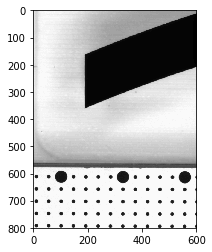

In [677]:
#randomly select  an image
image_name = info.sample(n = 1)['image_name'].values[0]"

#load the image
image = Image.open(image_path + image_name)

#convert from 16 to 8bit
image = np.asarray(image)
image_np= (image/256).astype('uint8')
image_pil = Image.fromarray(image_np)

#show the image
plt.imshow(image_np, cmap = 'gray')

In [678]:
#apply hough transformation to get circles
circles = cv2.HoughCircles(image_np, cv2.HOUGH_GRADIENT,0.1, 10,
                            param1=50,param2=50,minRadius=15,maxRadius=35)

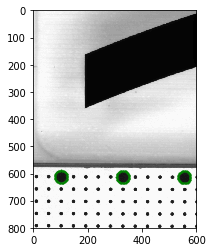

In [679]:
#define the angle to draw circles
phi = np.arange(0, 2*np.pi, 0.1)

#initialize a dict with the coordinates to big markers
marker_major = dict(x = [], y = [], r = [])

#draw the circles that mark the big markers
for ic in circles[0,:]:
    marker_major['x'].append(ic[0])
    marker_major['y'].append(ic[1])
    marker_major['r'].append(ic[2]) 
    
    x = ic[0] + ic[2]*np.cos(phi)
    y = ic[1] + ic[2]*np.sin(phi)
    plt.scatter(x, y, s = 1, edgecolors = 'g', facecolors = None)

#show the image
plt.imshow(image_np, cmap = 'gray')

In [680]:
#show the dictionary
marker_major

{'x': [102.5, 555.5, 329.5],
 'y': [611.5, 613.5, 612.5],
 'r': [22.9, 23.0, 23.1]}

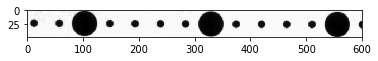

In [681]:
#show the image below the big markers
y_up = int(max(marker_major['y'])) + int(max(marker_major['r']))
y_low = int(min(marker_major['y'])) - int(max(marker_major['r']))
sub_image_np = image_np[y_low:y_up]

plt.imshow(sub_image_np, cmap = 'gray')

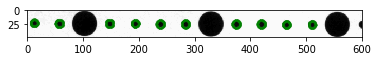

In [682]:
#apply hough transformation to get small circles
circles = cv2.HoughCircles(sub_image_np, cv2.HOUGH_GRADIENT,0.1, 5,
                            param1=50,param2=20,minRadius=1,maxRadius=8)

#define the angle to draw circles
phi = np.arange(0, 2*np.pi, 0.1)

#initialize a dict with the coordinates to big markers
marker_minor = dict(x = [], y = [], r = [])

#draw the circles that mark the big markers
for ic in circles[0,:]:
    marker_minor['x'].append(ic[0])
    marker_minor['y'].append(ic[1])
    marker_minor['r'].append(ic[2]) 
    
    x = ic[0] + ic[2]*np.cos(phi)
    y = ic[1] + ic[2]*np.sin(phi)
    plt.scatter(x, y, s = 1, edgecolors = 'g', facecolors = None)

#show the image
plt.imshow(sub_image_np, cmap = 'gray')

In [683]:
#show the dict
marker_minor

{'x': [283.5, 12.5, 464.5, 238.5, 57.5, 374.5, 419.5, 147.5, 193.5, 510.5],
 'y': [24.5, 22.5, 25.5, 24.5, 23.5, 24.5, 24.5, 23.5, 23.5, 25.5],
 'r': [6.9, 6.2, 6.2, 7.0, 7.0, 7.0, 7.0, 7.0, 6.2, 6.2]}

In [684]:
def match_markers(img):
    #apply hough transformation to get major circles
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,0.1, 10,
                            param1=50,param2=50,minRadius=15,maxRadius=35)
    
    #initialize a dict with the coordinates to big markers
    major = dict(x = [], y = [], r = [])
    
    #get the major coordinates
    for ic in circles[0,:]:
        major['x'].append(ic[0])
        major['y'].append(ic[1])
        major['r'].append(ic[2]) 
    
    #show the image below the big markers
    y_up = int(max(major['y'])) + int(max(major['r']))
    y_low = int(min(major['y'])) - int(max(major['r']))
    sub_img = img[y_low:y_up]
    
    #get the y-offset that is introduced by cropping the image
    y_offset = y_low
    
    #apply hough transformation to get minor circles
    circles = cv2.HoughCircles(sub_img, cv2.HOUGH_GRADIENT,0.1, 5,
                                param1=50,param2=20,minRadius=1,maxRadius=8)

    #initialize a dict with the coordinates to small markers
    minor = dict(x = [], y = [], r = [])
    
    #get the minor coordinates
    for ic in circles[0,:]:
        minor['x'].append(ic[0])
        minor['y'].append(ic[1] + y_offset)
        minor['r'].append(ic[2]) 
        
    return minor, major

In [685]:
#read the csv with all informations
info = pd.read_csv('meta.csv', sep = ';')
info.tail()

,image_name,se_id,datetime,side,state
8319,394139_20161117-223313_R.tif,394139,2016-11-17 22:33:13,R,post
8320,394325_20161118-064654_L.tif,394325,2016-11-18 06:46:54,L,pre
8321,394325_20161118-064654_R.tif,394325,2016-11-18 06:46:54,R,pre
8322,394325_20161118-064937_L.tif,394325,2016-11-18 06:49:37,L,post
8323,394325_20161118-064937_R.tif,394325,2016-11-18 06:49:37,R,post


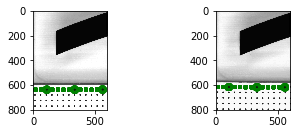

In [687]:
image_path = "./../no_sync/SmtImageData/"
image_name = "342409_20161007-190700_L.tif"

side = info.loc[info['image_name'] == image_name, 'side'].values[0]
se_id = info.loc[info['image_name'] == image_name, 'se_id'].values[0]

pair = info[(info['side'] == side) & (info['se_id'] == se_id)]

img_name_pre = pair.loc[pair['state'] == 'pre', 'image_name'].values[0]
img_name_post = pair.loc[pair['state'] == 'post', 'image_name'].values[0]

#load the image
img_pre = Image.open(image_path + img_name_pre)
img_pre = np.asarray(img_pre)
img_post = Image.open(image_path + img_name_post)
img_post = np.asarray(img_post)

#convert from 16 to 8bit
img_pre = (img_pre/256).astype('uint8')
img_post = (img_post/256).astype('uint8')

#get the marker coordinates
minor_pre, major_pre = match_markers(img_pre)
minor_post, major_post = match_markers(img_post)

#summarize data in dataframe
pre_marker = pd.DataFrame(dict(x = minor_pre['x'] + major_pre['x'],
                               y = minor_pre['y'] + major_pre['y'],
                               r = minor_pre['r'] + major_pre['r'],
                               sz = len(minor_pre['x'])*[0] + len(major_pre['x'])*[1]))
post_marker = pd.DataFrame(dict(x = minor_post['x'] + major_post['x'],
                               y = minor_post['y'] + major_post['y'],
                               r = minor_post['r'] + major_post['r'],
                               sz = len(minor_post['x'])*[0] + len(major_post['x'])*[1]))

#initialize the axes
ax1 = plt.subplot(2,2,2)
ax2 = plt.subplot(2,2,1)

#define the angle to draw circles
phi = np.arange(0, 2*np.pi, 0.02)

#draw the circles that mark the markers
for idx in pre_marker.index:
    x_pre = pre_marker.loc[idx, 'x'] + pre_marker.loc[idx, 'r']*np.cos(phi)
    y_pre = pre_marker.loc[idx, 'y'] + pre_marker.loc[idx, 'r']*np.sin(phi)
    ax1.scatter(x_pre, y_pre, s = 1, edgecolors = 'g', facecolors = None)
for idx in post_marker.index:
    x_post = post_marker.loc[idx, 'x'] + post_marker.loc[idx, 'r']*np.cos(phi)
    y_post = post_marker.loc[idx, 'y'] + post_marker.loc[idx, 'r']*np.sin(phi)
    ax2.scatter(x_post, y_post, s = 1, edgecolors = 'g', facecolors = None)

#show the image
ax1.imshow(img_pre, cmap = 'gray')
ax2.imshow(img_post, cmap = 'gray')

In [569]:
pre_marker.sort_values(by = ['y', 'x'], ascending = [False, True])

,x,y,r,sz
6,351.5,728.5,6.2,0
2,396.5,728.5,6.9,0
1,441.5,728.5,6.9,0
11,486.5,728.5,23.0,1
5,532.5,728.5,6.2,0
7,577.5,728.5,6.2,0
4,170.5,727.5,6.2,0
0,215.5,727.5,6.9,0
10,260.5,727.5,23.0,1
9,306.5,727.5,6.2,0


In [570]:
post_marker.sort_values(by = ['y', 'x'], ascending = [False, True])

,x,y,r,sz
6,442.5,733.5,7.0,0
11,487.5,733.5,23.0,1
3,532.5,733.5,6.9,0
7,577.5,733.5,7.0,0
8,170.5,732.5,6.2,0
4,216.5,732.5,6.2,0
10,261.5,732.5,22.9,1
1,306.5,732.5,6.9,0
5,351.5,732.5,6.2,0
9,397.5,732.5,6.2,0


In [671]:
marker = pd.DataFrame(data = dict(x_pre = [], y_pre = [], r_pre = [], sz_pre = [],
                        x_post = [], y_post = [], r_post = [], sz_post = []))

for idx in post_marker.index:
    post_row = post_marker.iloc[[idx]]
    dx = pre_marker['x'].values - post_row['x'].values[0]
    dy = pre_marker['y'].values - post_row['y'].values[0]
    dr = np.sqrt(dx**2 + dy**2)
    pre_row = pre_marker.iloc[[np.argmin(dr)]]
    
    pre_row.rename(columns={"x": "x_pre", "y": "y_pre", "r": "r_pre", "sz": "sz_pre"}, inplace = True)
    pre_row.reset_index(drop = True, inplace = True)
    post_row.rename(columns={"x": "x_post", "y": "y_post", "r": "r_post", "sz": "sz_post"}, inplace = True)
    post_row.reset_index(drop = True, inplace = True)
    
    marker_row = pd.concat([pre_row, post_row], axis = 1)
    marker = pd.concat([marker, marker_row], axis = 0)

marker = marker[["x_pre", "x_post", "y_pre", "y_post", "r_pre", "r_post", "sz_pre", "sz_post"]]
marker.reset_index(drop = True)

,x_pre,x_post,y_pre,y_post,r_pre,r_post,sz_pre,sz_post
0,79.5,80.5,726.5,731.5,7.0,6.9,0.0,0.0
1,306.5,306.5,727.5,732.5,6.2,6.9,0.0,0.0
2,125.5,125.5,726.5,731.5,6.2,6.9,0.0,0.0
3,532.5,532.5,728.5,733.5,6.2,6.9,0.0,0.0
4,215.5,216.5,727.5,732.5,6.9,6.2,0.0,0.0
5,351.5,351.5,728.5,732.5,6.2,6.2,0.0,0.0
6,441.5,442.5,728.5,733.5,6.9,7.0,0.0,0.0
7,577.5,577.5,728.5,733.5,6.2,7.0,0.0,0.0
8,170.5,170.5,727.5,732.5,6.2,6.2,0.0,0.0
9,396.5,397.5,728.5,732.5,6.9,6.2,0.0,0.0


In [672]:
marker.to_csv('marker.csv', sep = ';', index = False)